In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

C:\Users\user\Miniconda3\envs\jcopmlbdg\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Import Data

In [2]:
concrete_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/training_set_label.csv" )

In [3]:
df = concrete_data
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,298.20,0.0,107.00,209.70,11.10,879.6,744.20,28,31.875165
1,397.00,0.0,0.00,186.00,0.00,1040.0,734.00,28,36.935229
2,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,56,36.638755
3,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902
4,297.00,0.0,0.00,186.00,0.00,1040.0,734.00,7,30.957472


### Data Description


- __Cement__ (component 1)(kg in a m3 mixture): Cement   (component 1) -- Kilogram in a meter-cube mixture -- Input Variable
- __Blast Furnace Slag__ (component 2)(kg in a m3 mixture): Blast Furnace   Slag (component 2) -- kg in a m3 mixture -- Input Variable
- __Fly Ash__ (component 3)(kg in a m3 mixture): Fly Ash   (component 3) -- kg in a m3 mixture -- Input Variable
- __Water__  (component 4)(kg in a m3   mixture): Water   (component 4) -- kg in a m3 mixture -- Input Variable
- __Superplasticizer__ (component 5)(kg in a m3 mixture): Superplasticizer   (component 5) -- kg in a m3 mixture -- Input Variable
- __Coarse Aggregate__  (component 6)(kg   in a m3 mixture): Coarse   Aggregate (component 6) -- kg in a m3 mixture -- Input Variable
- __Fine Aggregate__ (component 7)(kg in a m3 mixture): Fine Aggregate   (component 7) -- kg in a m3 mixture -- Input Variable
- __Age__ (day): Age -- Day   (1-365) -- Input Variable
<br>
<br>
- __Concrete compressive strength__(MPa, megapascals): Concrete   compressive strength -- MegaPascals -- Output Variable


In [4]:
df.columns = ['cement', 'blast', 'fly ash', 'water', 'superplasticizer', 'coarse', 'fine', 'age', 'strength']
df.head()

,cement,blast,fly ash,water,superplasticizer,coarse,fine,age,strength
0,298.20,0.0,107.00,209.70,11.10,879.6,744.20,28,31.875165
1,397.00,0.0,0.00,186.00,0.00,1040.0,734.00,28,36.935229
2,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,56,36.638755
3,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902
4,297.00,0.0,0.00,186.00,0.00,1040.0,734.00,7,30.957472


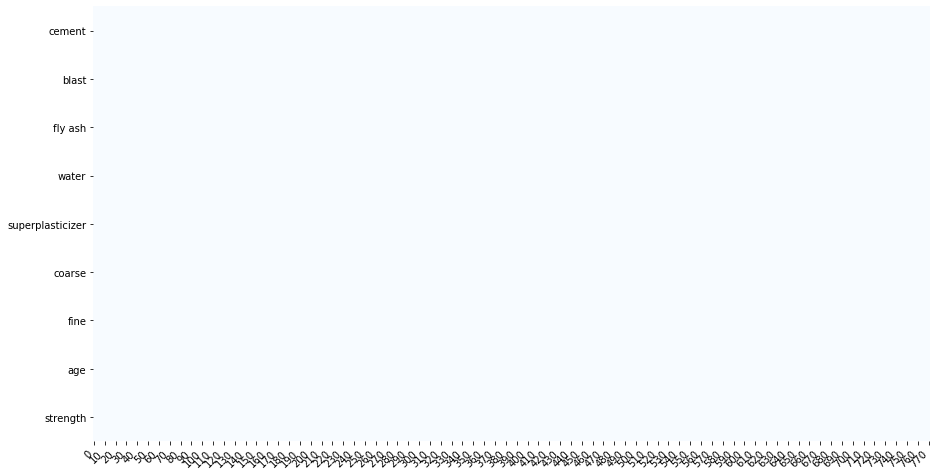

In [5]:
plot_missing_value(df)

The data is clean so we can continue straight to make our simple model.

# Dataset Splitting

In [6]:
X = df.drop(columns="strength")
y = df.strength

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((617, 8), (155, 8), (617,), (155,))

In [7]:
X_train.describe()

,cement,blast,fly ash,water,superplasticizer,coarse,fine,age
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,278.724635,78.370016,53.239271,181.785559,6.090958,970.032253,774.606110,42.027553
std,103.599890,87.160823,64.377636,20.924733,5.941755,76.686255,77.004198,55.931030
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000
25%,190.000000,0.000000,0.000000,165.000000,0.000000,932.000000,734.000000,7.000000
50%,272.800000,26.000000,0.000000,185.700000,6.000000,968.000000,778.450000,28.000000
75%,350.000000,145.000000,118.270000,192.940000,10.300000,1025.000000,822.200000,56.000000
max,540.000000,359.400000,200.100000,228.000000,32.200000,1145.000000,992.600000,365.000000


In [8]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

C:\Users\user\Miniconda3\envs\jcopmlbdg\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\Miniconda3\envs\jcopmlbdg\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns),
    #('categoric', cat_pipe(encoder='onehot'), ["_____________"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=4, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 193 out of 200 | elapsed:   15.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   15.9s finished


{'algo__colsample_bytree': 0.9763799669573133, 'algo__gamma': 3, 'algo__learning_rate': 0.05820013372709852, 'algo__max_depth': 4, 'algo__n_estimators': 163, 'algo__reg_alpha': 0.07362945281639222, 'algo__reg_lambda': 2.752717392942944, 'algo__subsample': 0.6401537692938899}
0.9711376611686909 0.8893869106126857 0.913470603302121


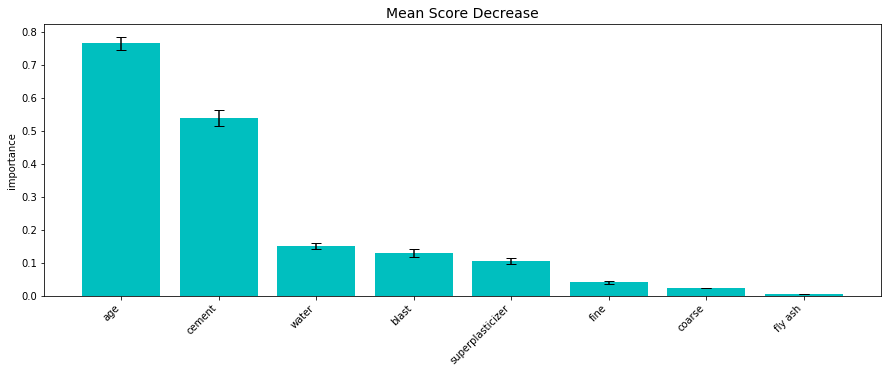

In [10]:
check = mean_score_decrease(X_train, y_train, model, plot=True)

The model told us that the most significant parameter to our target column is age and cement columns, and dropped significantly on other columns. With our simple model, we will try to submit the result and it used RMSE as their assessment. Thus I make the function below and also predict the test data.

In [11]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

predict = model.predict(X_test)
rmse(predict, y_test)

4.887466125157778

In [12]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/testing_set_label.csv')
test_data.columns = ['cement', 'blast', 'fly ash', 'water', 'superplasticizer', 'coarse', 'fine', 'age']
test_data.head()

,cement,blast,fly ash,water,superplasticizer,coarse,fine,age
0,167.00,187.00,195.00,185.00,7.00,898.0,636.00,28
1,148.50,139.40,108.60,192.70,6.10,892.4,780.00,28
2,154.80,0.00,142.80,193.30,9.10,877.2,867.70,28
3,236.00,0.00,0.00,193.00,0.00,968.0,885.00,365
4,168.88,42.22,124.25,158.33,10.83,1080.8,796.15,14


In [14]:
predictions = model.predict(test_data)

res = pd.DataFrame(predictions)
res.columns = ["prediction"]
res.to_csv("concrete_strength_simple_xgb.csv", index=False)   

ac = pd.read_csv("concrete_strength_simple_xgb.csv")
ac.tail()

# Exploratory Data Analysis
This data composed entirely of numerical data, so we can check all each parameter correlation with our target column

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df.head()

,cement,blast,fly ash,water,superplasticizer,coarse,fine,age,strength
0,298.20,0.0,107.00,209.70,11.10,879.6,744.20,28,31.875165
1,397.00,0.0,0.00,186.00,0.00,1040.0,734.00,28,36.935229
2,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,56,36.638755
3,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902
4,297.00,0.0,0.00,186.00,0.00,1040.0,734.00,7,30.957472


In [26]:
df.describe()

,cement,blast,fly ash,water,superplasticizer,coarse,fine,age,strength
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,280.722565,76.496140,52.701347,182.361593,6.000848,971.558782,771.618355,44.993523,35.724196
std,104.711803,87.477423,63.596763,20.913641,5.844002,77.078828,79.785875,60.442735,16.797389
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,166.677500,0.000000,932.000000,724.300000,12.250000,23.677591
50%,275.000000,24.000000,0.000000,185.700000,6.050000,968.000000,777.800000,28.000000,33.870853
75%,350.000000,144.775000,118.187500,193.000000,10.025000,1028.100000,821.000000,56.000000,46.232813
max,540.000000,359.400000,200.100000,237.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## Checking each column

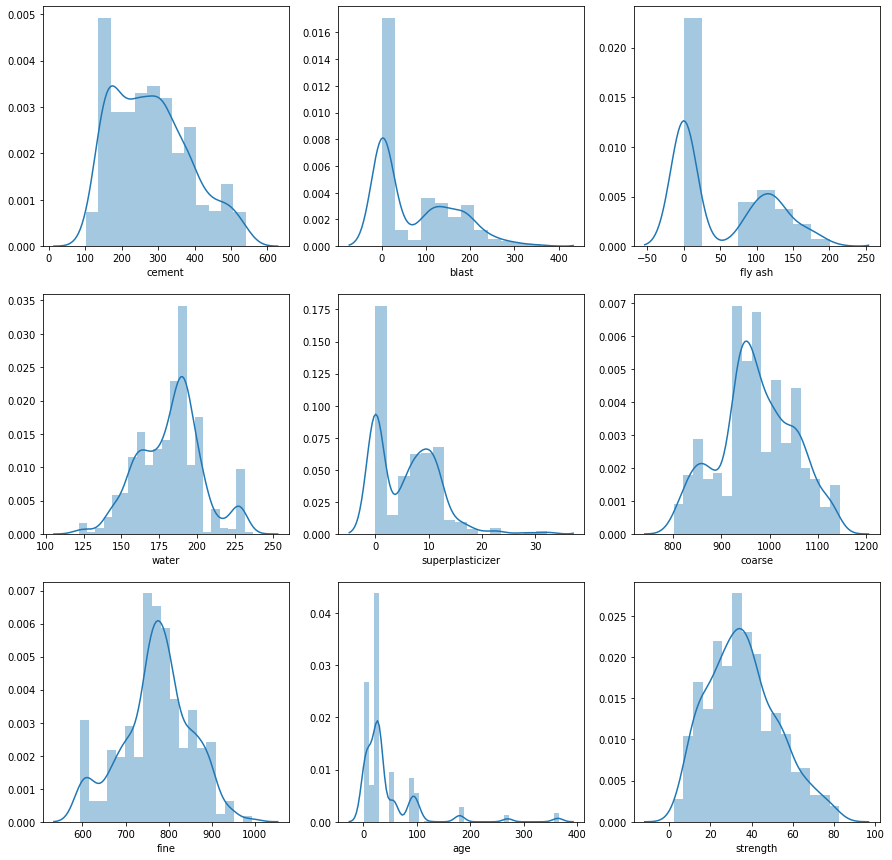

In [23]:
rows = 3
cols = 3
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

for var in df.columns:
    i+= 1
    plt.subplot(rows, cols, i)
    _ = sns.distplot(df[var])

The data here divided by their distribution. The columns with normal distribution are cement, water, coarse, and fine (exclude the strength column) and the columns on other category are blast, fly ash, superplasticizer, and age.

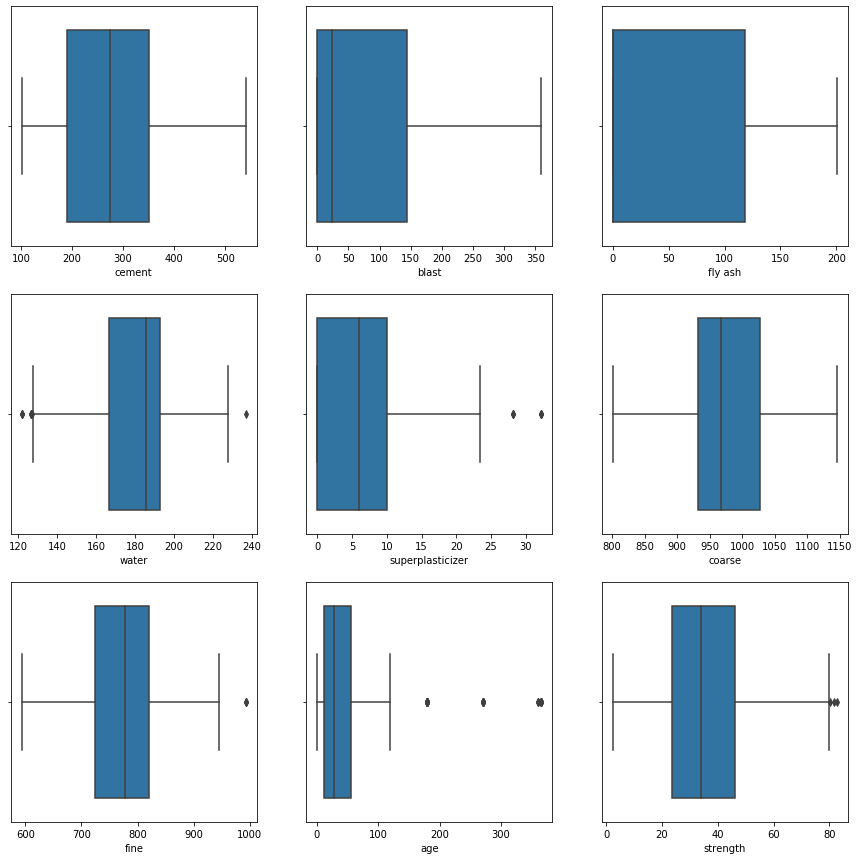

In [25]:
rows = 3
cols = 3
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

for var in df.columns:
    i+= 1
    plt.subplot(rows, cols, i)
    _ = sns.boxplot(df[var])

We see some outliers data that shown on superplasticizer and age columns. We can remove them later to make the model better.

In [34]:
df.shape[0]

772

In [33]:
df[df.age > 200].shape[0]

22

## Checking relation from each column

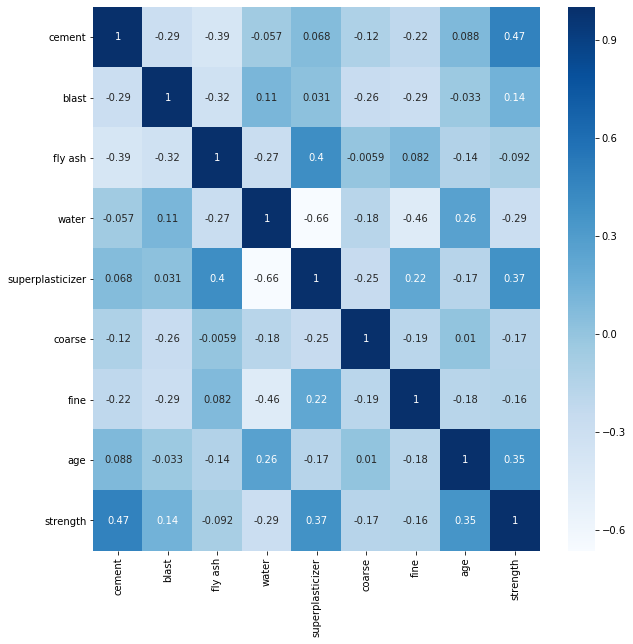

In [35]:
plt.figure(figsize=(10, 10))
_ = sns.heatmap(df.corr(), cmap='Blues', annot=True)

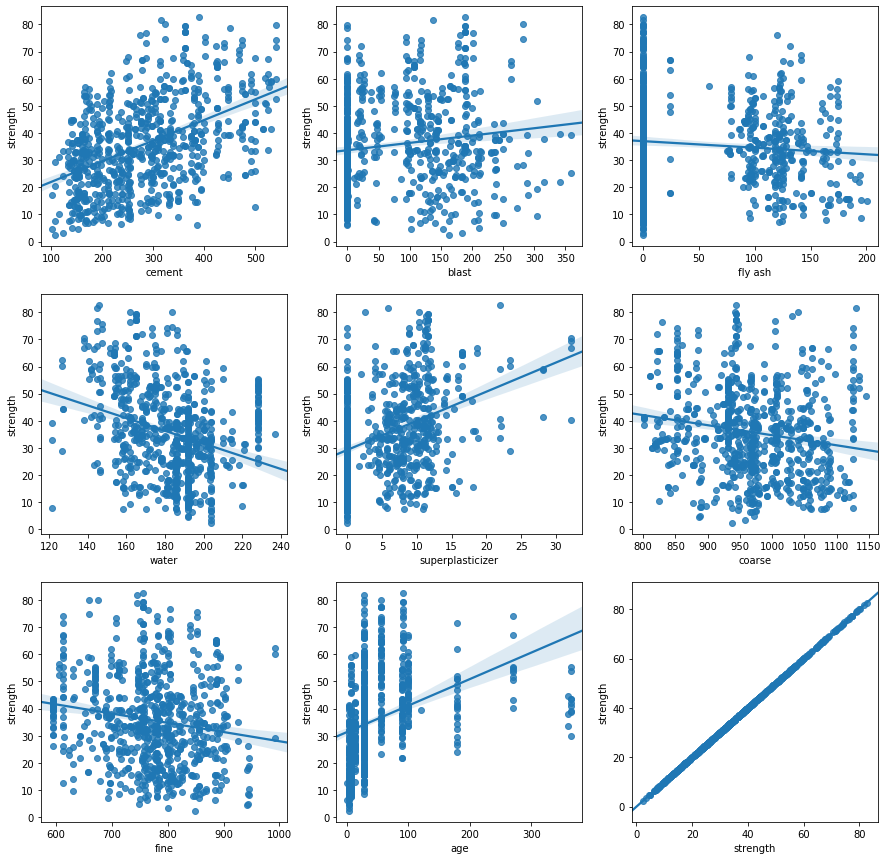

In [42]:
rows = 3
cols = 3
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

for var in df.columns:
    i+= 1
    plt.subplot(rows, cols, i)
    _ = sns.regplot(x= df[var], y= df.strength)

The chart above shows us that cement, age, and superplasticizer column have somehow okay correlation with our target column (strength).

In [43]:
df[df.superplasticizer == 0].shape[0]

293

# Feature Engineering

## 1. Clearing outliers from age column
We can see from the boxplot that age above 200 days is considered outliers but as shown by our correlation plot, the data above 300 days is not good so we will drop them

In [90]:
df2 = df[df.age < 300]
df2.shape[0]

760

In [91]:
df.shape[0]
# we drop a total of 12 row 

772

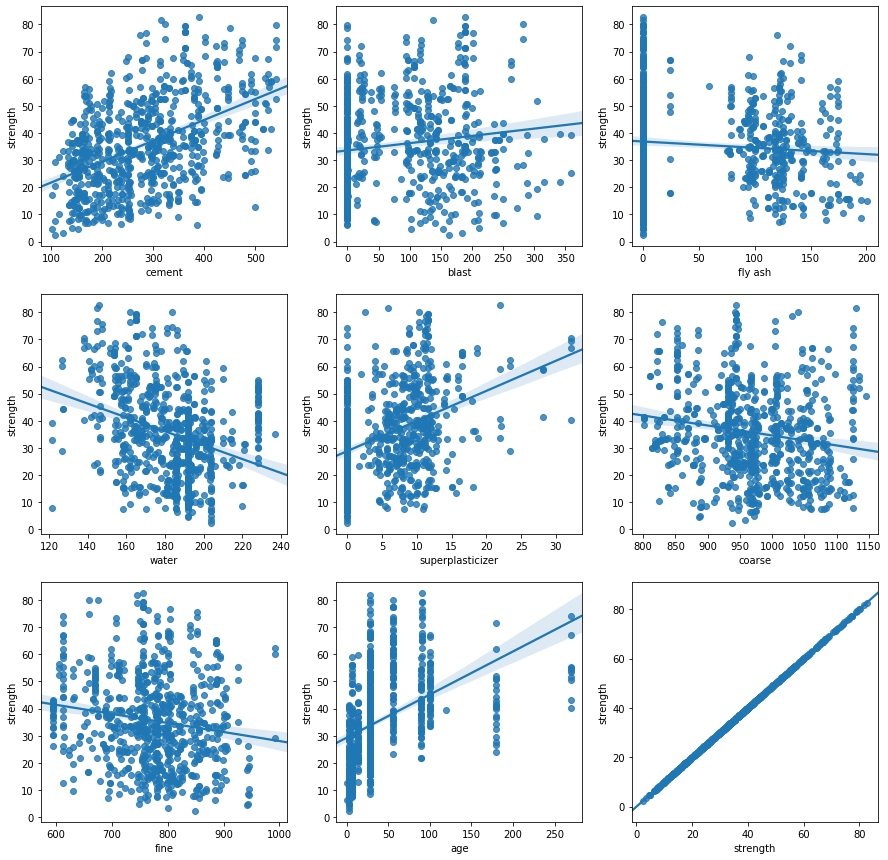

In [92]:
rows = 3
cols = 3
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

for var in df.columns:
    i+= 1
    plt.subplot(rows, cols, i)
    _ = sns.regplot(x= df2[var], y= df2.strength)

## Binnings
There is 3 column that interest me to use binnings which is blast, fly ash, and superplasticizer. This is because there is so much of those 3 column contain 0 of that parameter. So we can make the ingredients of those columns become `None, Low, Medium, an High` instead. 

In [93]:
df2[['blast', 'fly ash', 'superplasticizer']].describe()

,blast,fly ash,superplasticizer
count,760.000000,760.000000,760.000000
mean,76.390947,53.533474,6.095599
std,87.481581,63.748634,5.840719
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,24.000000,0.000000,6.325000
75%,144.775000,118.270000,10.100000
max,359.400000,200.100000,32.200000


In [95]:
df2['blast bin'] = pd.cut(df['blast'], bins=[-1, 1, 100, 225, 400], labels=['None', 'Low', 'Medium', 'High'])
df2['fly ash bin'] = pd.cut(df['fly ash'], bins=[-1, 1, 50, 125, 250], labels=['None', 'Low', 'Medium', 'High'])
df2['superplasticizer bin'] = pd.cut(df['superplasticizer'], bins=[-1, 1, 5, 15, 40], labels=['None', 'Low', 'Medium', 'High'])

df2.head(2)

C:\Users\user\Miniconda3\envs\jcopmlbdg\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Miniconda3\envs\jcopmlbdg\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Miniconda3\envs\jcopmlbdg\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,cement,blast,fly ash,water,superplasticizer,coarse,fine,age,strength,blast bin,fly ash bin,superplasticizer bin
0,298.2,0.0,107.0,209.7,11.1,879.6,744.2,28,31.875165,None,Medium,Medium
1,397.0,0.0,0.0,186.0,0.0,1040.0,734.0,28,36.935229,None,None,None


## More models try 

In [96]:
X = df2.drop(columns="strength")
y = df2.strength

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((608, 11), (152, 11), (608,), (152,))

In [97]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['cement', 'water', 'coarse', 'fine', 'age']),
    ('categoric', cat_pipe(encoder='onehot'), ['blast bin', 'fly ash bin', 'superplasticizer bin']),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=4, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   22.4s finished


{'algo__colsample_bytree': 0.7048235217656795, 'algo__gamma': 3, 'algo__learning_rate': 0.08534852819566893, 'algo__max_depth': 6, 'algo__n_estimators': 157, 'algo__reg_alpha': 2.7645119606152053, 'algo__reg_lambda': 0.010023177978572915, 'algo__subsample': 0.3194173672147116}
0.9864721171328091 0.9081041139961205 0.8912947940796351


In [ ]:
0.9711376611686909 0.8893869106126857 0.913470603302121

In [99]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/testing_set_label.csv')
test_data.columns = ['cement', 'blast', 'fly ash', 'water', 'superplasticizer', 'coarse', 'fine', 'age']

test_data['blast bin'] = pd.cut(test_data['blast'], bins=[-1, 1, 100, 225, 400], labels=['None', 'Low', 'Medium', 'High'])
test_data['fly ash bin'] = pd.cut(test_data['fly ash'], bins=[-1, 1, 50, 125, 250], labels=['None', 'Low', 'Medium', 'High'])
test_data['superplasticizer bin'] = pd.cut(test_data['superplasticizer'], bins=[-1, 1, 5, 15, 40], labels=['None', 'Low', 'Medium', 'High'])

test_data.head(2)

,cement,blast,fly ash,water,superplasticizer,coarse,fine,age,blast bin,fly ash bin,superplasticizer bin
0,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,Medium,High,Medium
1,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,Medium,Medium,Medium


In [100]:
predictions = model.predict(test_data)

res = pd.DataFrame(predictions)
res.columns = ["prediction"]
res.to_csv("concrete_strength_binoutlier_xgb.csv", index=False)   

ac = pd.read_csv("concrete_strength_binoutlier_xgb.csv")
ac.tail()

,prediction
253,61.513630
254,60.327923
255,18.428060
256,29.823492
257,44.557540


Using this feature engineering, I got lower score on my submission. I need another tuning to make the model better and this will be continued later.
__My best RMSE: 4.474__